In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the Dataset

In [3]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.duplicated().sum()

0

Seperate X and Y (Drop statistically insignificant)

In [8]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [9]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [10]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


Separate Cat and Con Variables

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

Create a preprocessing Pipeline for X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [20]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
29391,-0.194806,0.620091,-0.225832,-0.017483,-0.506668,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
111006,0.073688,1.053251,0.372426,-0.546758,1.259929,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
16102,0.288483,0.475704,-0.658308,0.770549,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
110599,1.040265,0.764477,0.985100,-0.864323,0.228111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
84638,2.114241,2.280539,-0.506942,0.323605,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [21]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
22333,1.684651,1.702992,-0.283496,-0.240955,0.071775,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
35216,1.953144,1.558605,3.068191,-2.263961,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
112970,1.308759,0.836671,-0.622268,2.146663,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
14905,0.664374,0.331317,0.466129,-0.511473,-0.209629,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
25676,1.308759,1.269831,4.949460,-2.863806,-1.085111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0


In [22]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [23]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


Algorithm evaluation process

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
dct = {'Logistic' : LogisticRegression(),
       'Desiscion Tree' : DecisionTreeClassifier(),
       'Random Forest' : RandomForestClassifier(),
       'Gradient Boost' : GradientBoostingClassifier(),
       'KNN' : KNeighborsClassifier(),
       'SVM' : SVC()}

In [28]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Desiscion Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [29]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [31]:
cv = []
for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    # Predict the results for tran and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # F1 score for train and test(For f1 score to calculate we have to consider here macro)
    tr_f1 = f1_score(ytrain, ypred_tr, average='macro')
    ts_f1 = f1_score(ytest, ypred_ts, average='macro')
    # Get Cross validation results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    cv.append(f1_cv)
    # Print above results
    print(f'Model : {name}\n')
    print(f'Training F1 : {tr_f1:.4f}')
    print(f'Testing F1 : {ts_f1:.4f}')
    print(f'Train CV : {f1_cv:.4f}')
    print('\n================================================================\n')


Model : Logistic

Training F1 : 0.9316
Testing F1 : 0.9255
Train CV : 0.9310


Model : Desiscion Tree

Training F1 : 0.9978
Testing F1 : 0.8779
Train CV : 0.8748


Model : Random Forest

Training F1 : 0.9978
Testing F1 : 0.9251
Train CV : 0.9296


Model : Gradient Boost

Training F1 : 0.9358
Testing F1 : 0.9260
Train CV : 0.9285


Model : KNN

Training F1 : 0.9312
Testing F1 : 0.9247
Train CV : 0.9290




KeyboardInterrupt: 

In [32]:
cv

[0.9310216042899387,
 0.8747712214777934,
 0.9296433204342683,
 0.9285270128838071,
 0.9289880106504385]

In [33]:
list(dct.keys())

['Logistic', 'Desiscion Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM']

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (5,).

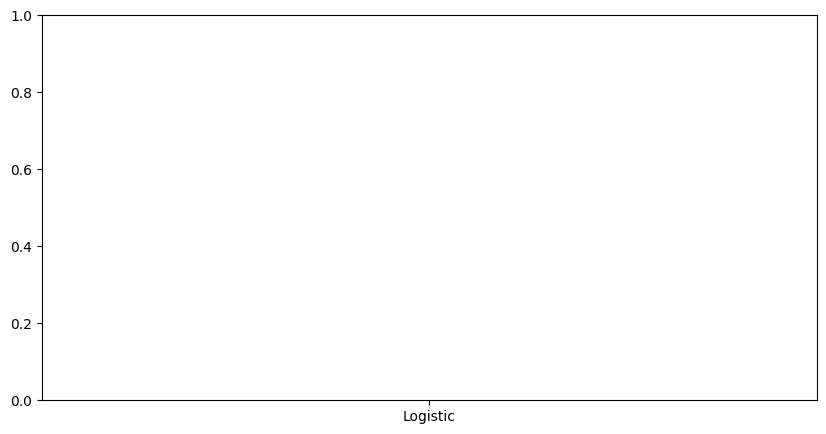

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(x=list(dct.keys()), height=cv)
plt.xlabel('Model Name')
plt.ylabel('F1 Macro CV')
plt.title('Plotting F1 Macro for different models')
plt.show()

Select Logistic model as it has highest Cross validation score of 0.9310

In [38]:
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

LogisticRegression()

In [39]:
best_model.score(xtrain, ytrain)

0.9962342981226464

In [40]:
best_model.score(xtest, ytest)

0.9959319797698454

Predict results for train and test

In [41]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

In [42]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [43]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [44]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [45]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


Plot the confusion matrix for the test

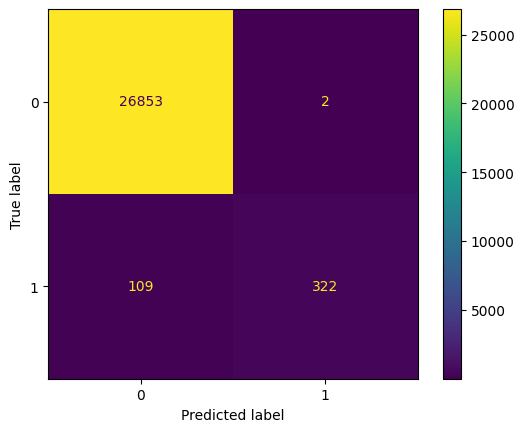

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_model.classes_)
cfd.plot()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       0.99      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       0.99      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



Plot the ROC AUC curve

In [48]:
from sklearn.metrics import RocCurveDisplay

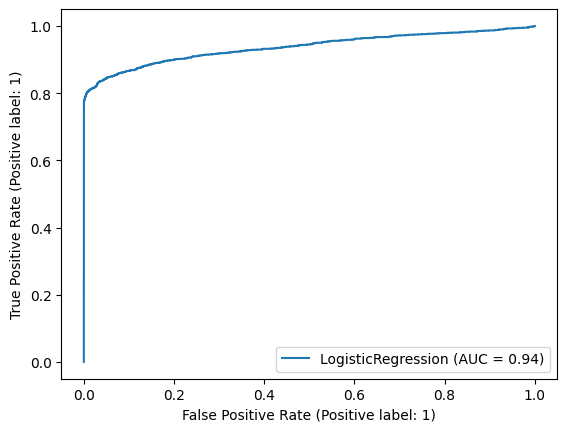

In [49]:
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

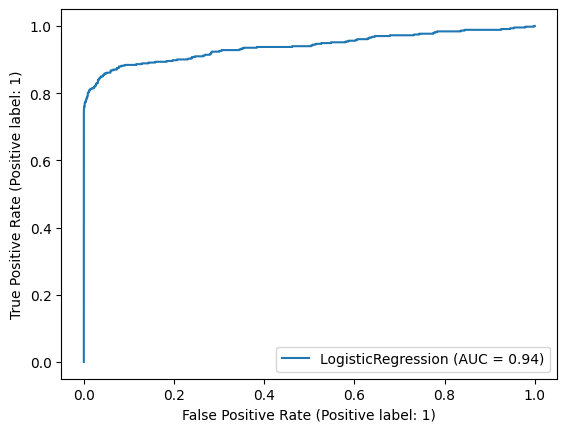

In [50]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

Cross validation for ROC_AUC

In [51]:
scores = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring='roc_auc')
scores

array([0.93702727, 0.9207793 , 0.93227671, 0.94558418, 0.94105956])

In [52]:
scores.mean()

0.9353454051600458

Predicting out of sample data

In [53]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [54]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [55]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

Apply pre.transform on xnew

In [56]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


Perform predictions along with probaiblity

In [57]:
preds = best_model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.0023139 , 0.00126969, 0.00279598, 0.00362319, 0.00383123])

Save above results in dataframe

In [59]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [60]:
df_final['Machine Failure'] = preds
df_final['Probability'] = probs

In [61]:
df_final

,id,Machine Failure,Probability
0,136429,0,0.002314
1,136430,0,0.001270
2,136431,0,0.002796
3,136432,0,0.003623
4,136433,0,0.003831
...,...,...,...
90949,227378,0,0.002568
90950,227379,0,0.000532
90951,227380,0,0.002966
90952,227381,0,0.002681


<Axes: xlabel='Machine Failure'>

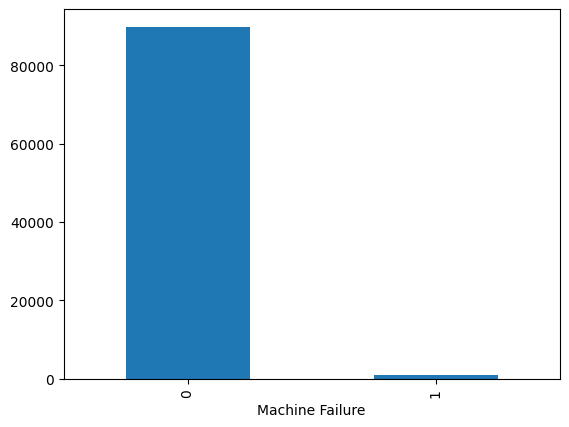

In [62]:
df_final['Machine Failure'].value_counts().plot(kind='bar')